# Homework #2 Part I: <br>Prove that as a function of $\theta$...

---

$$
\begin{align*}
&\color{white}{\propto}{} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

### Hint 1: expand the squares, and rebuild the quadratic in terms of $\theta$...
### Hint 2: anything that's not $\theta$ is a constant... and you can drop or multiply by any constants you want to complete the square...


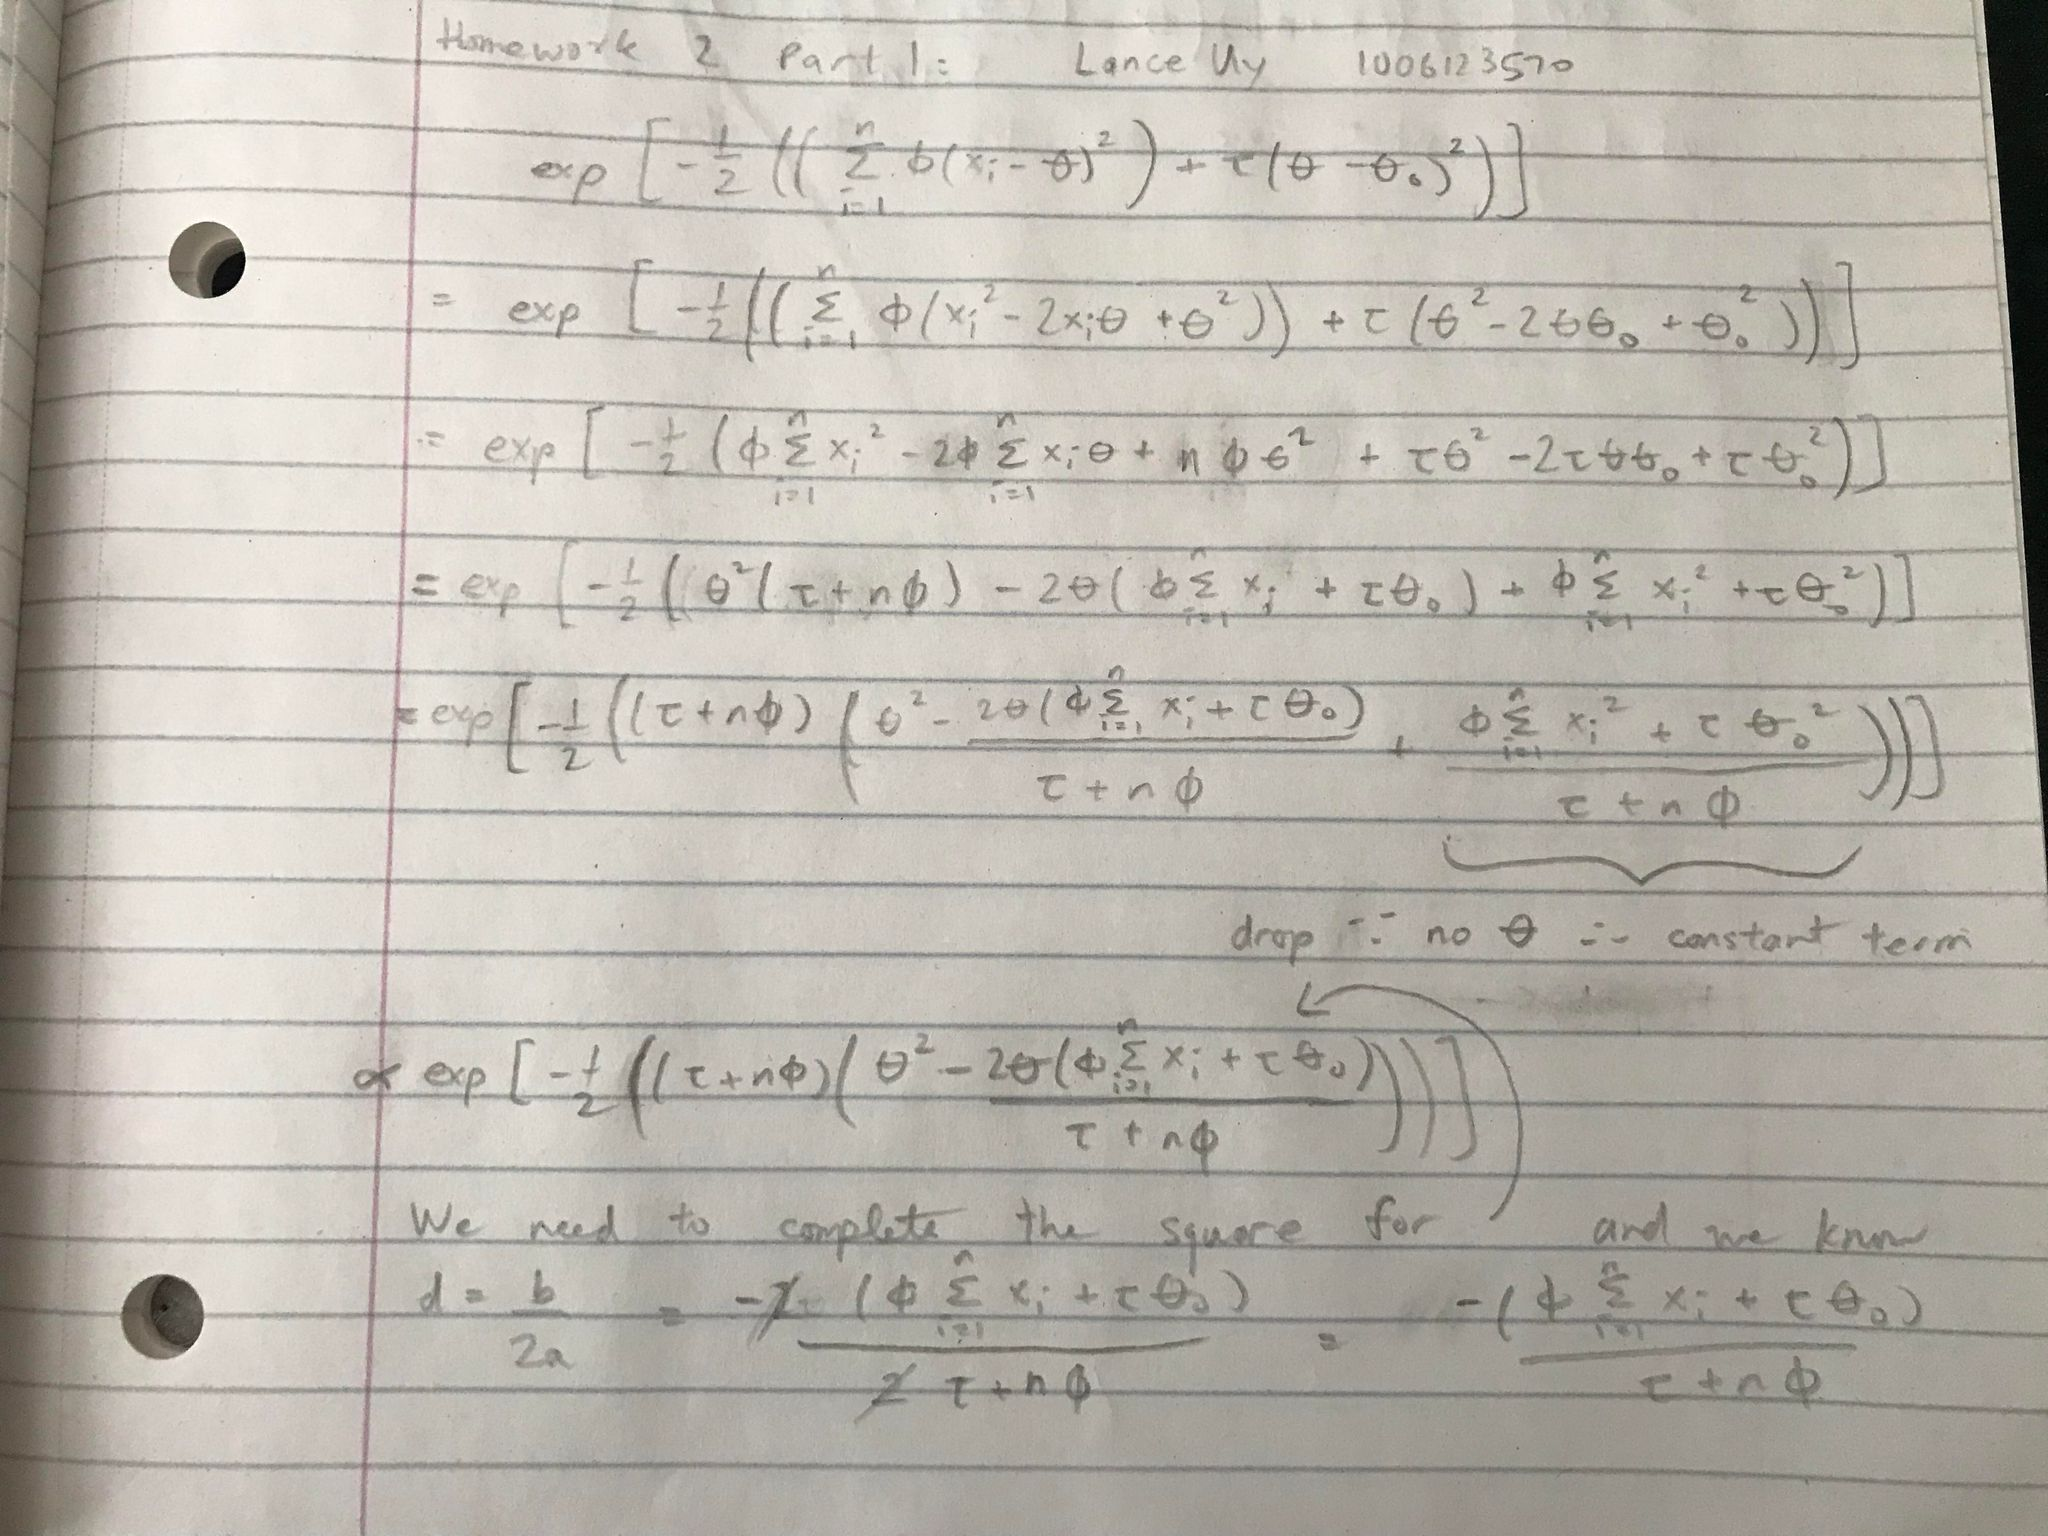

In [24]:
from IPython.display import Image

Image("hw2a.jpg", width=800, height=500)

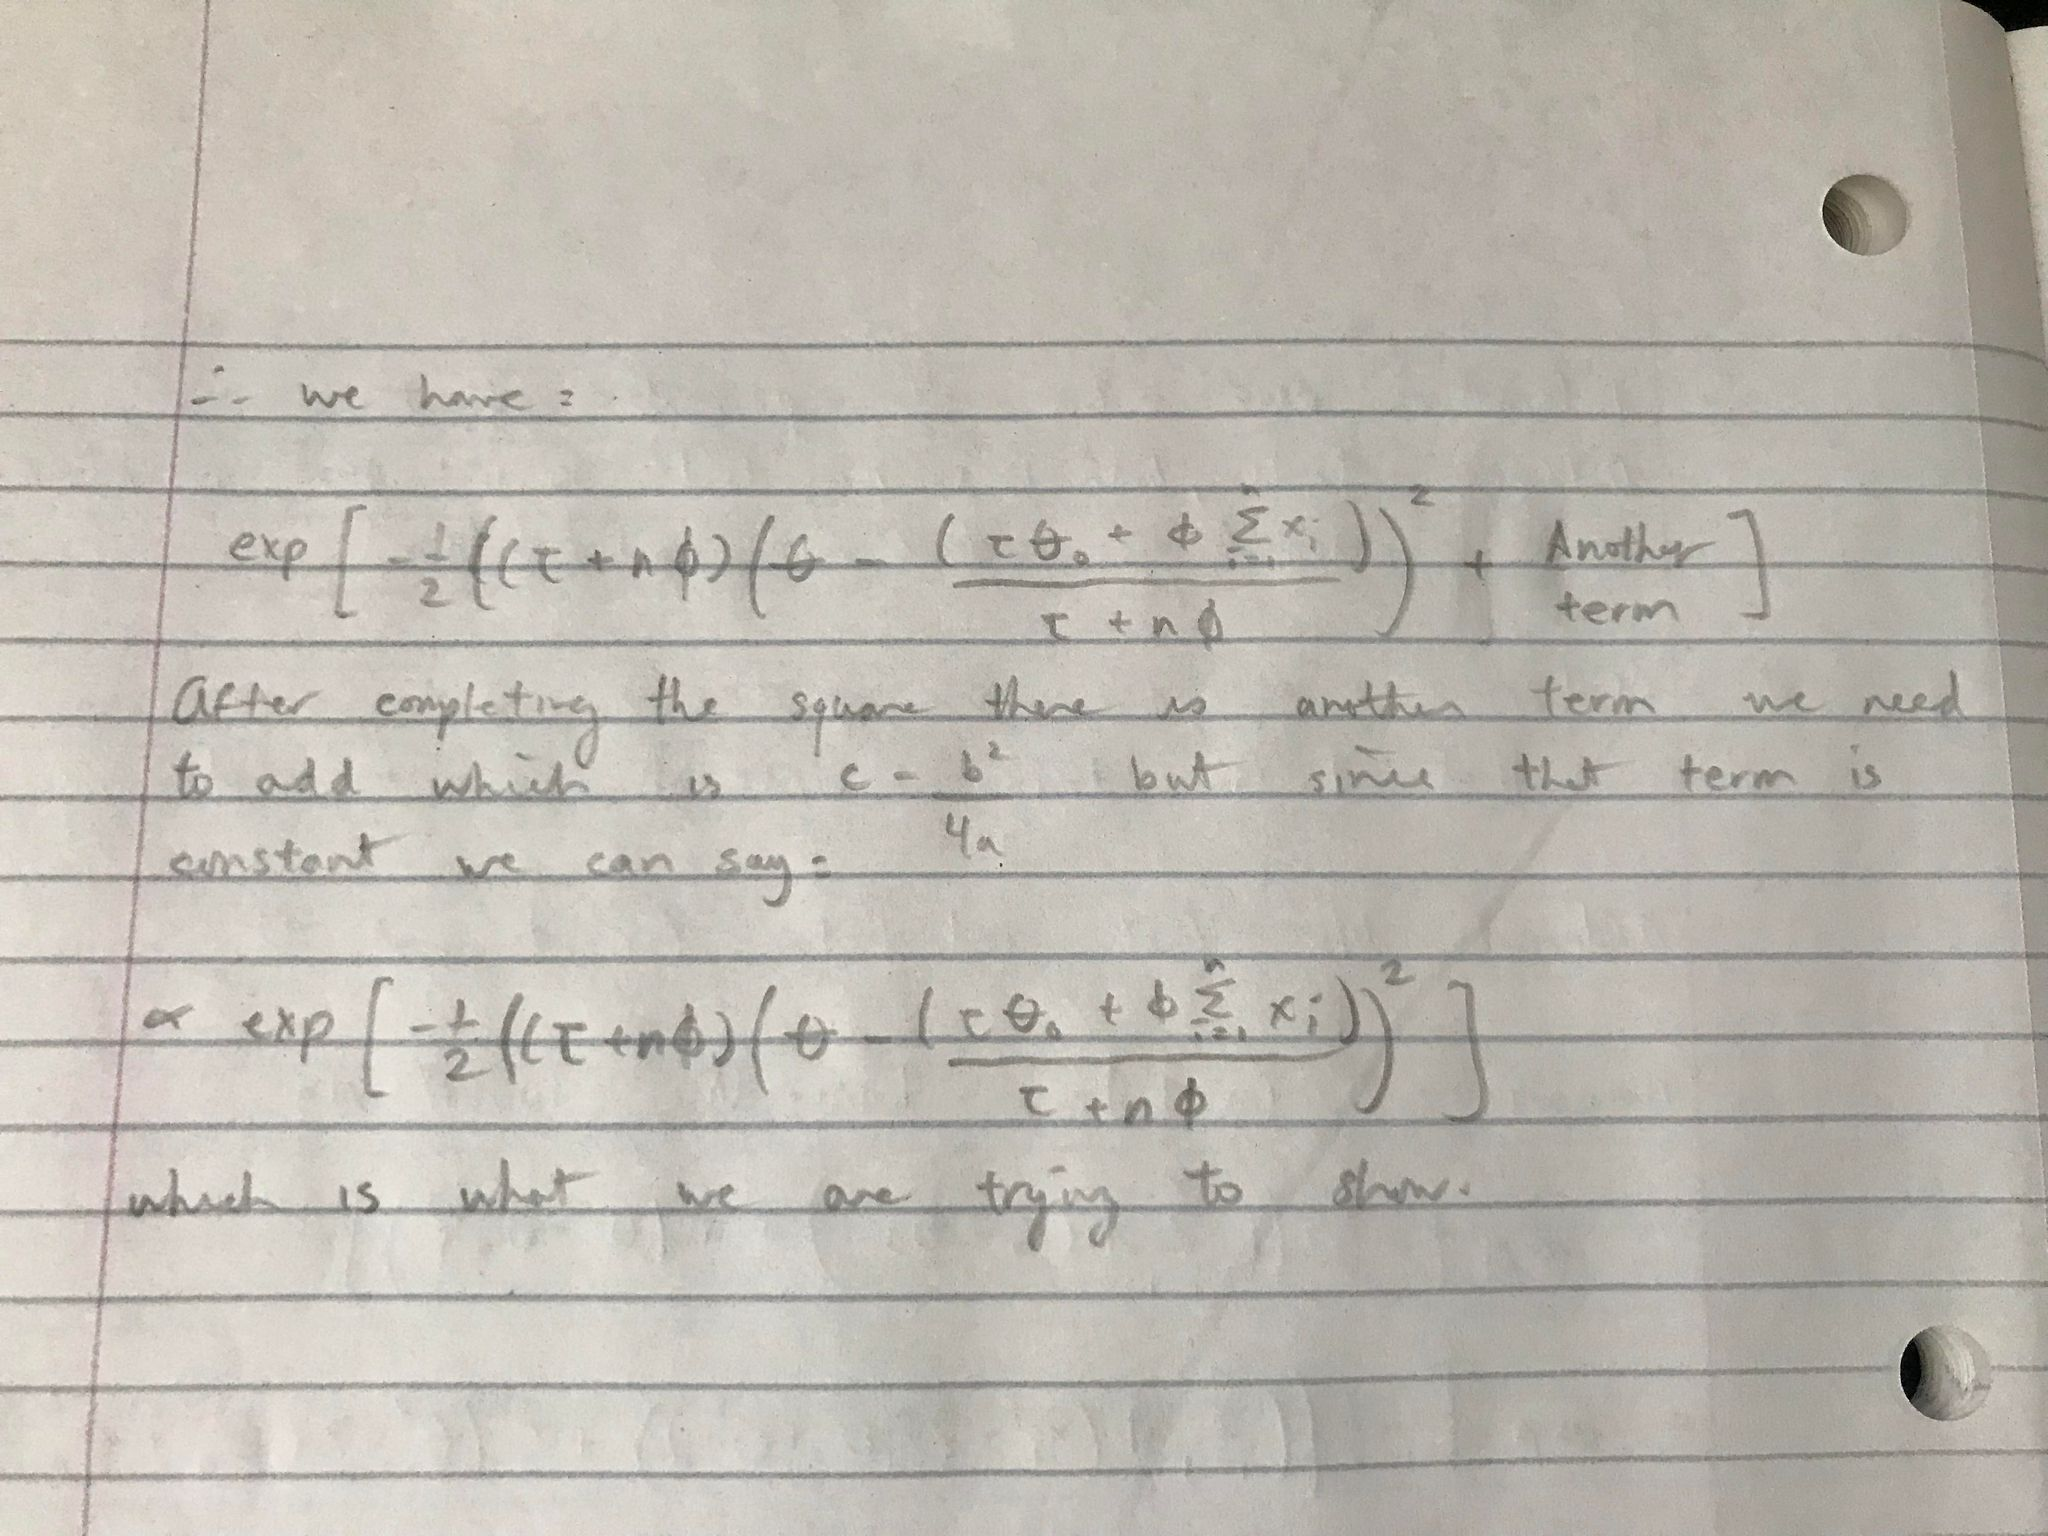

In [25]:
Image("hw2b.jpg", width=800, height=500)

# Homework #2 Part II: Complete the following... 

1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```     
2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`
    
3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?
4. What's the difference between a ***log likelihood*** and ***log posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***log of the marginal likelihood constant***. [Or, another way to start thinking about this is to instead as the question: What's the difference between a ***likelihood*** and ***posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***marginal likelihood constant***.]

<!-- posterior proporitional to joint... --> 


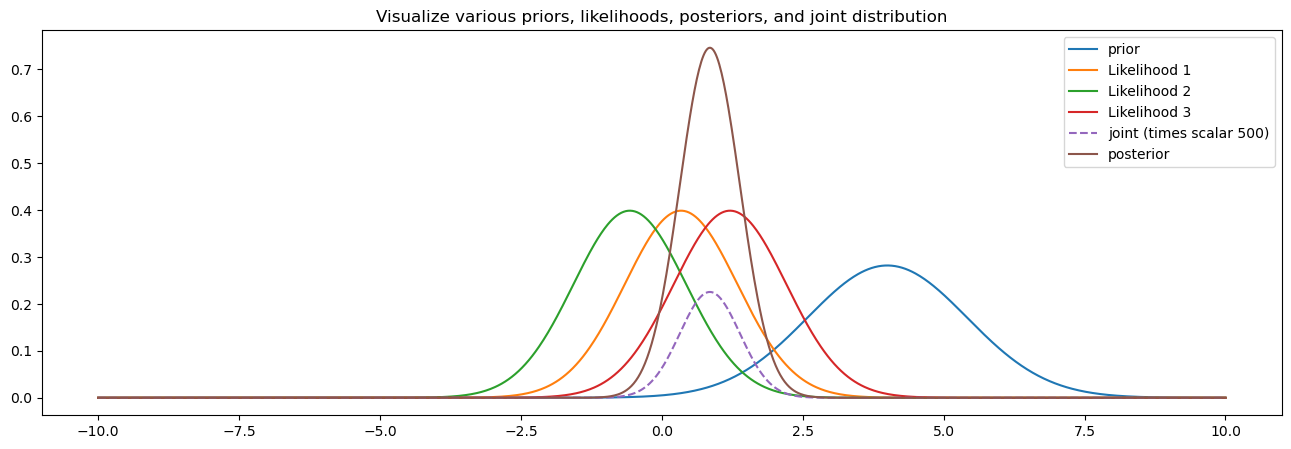

In [21]:
# PART 2 Q1

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1 / 2
parameter_domain = np.linspace(-10, 10, 1001)

prior = stats.norm(loc=theta_0, scale=1 / tau ** 0.5).pdf(parameter_domain)

c, c2 = 500, 10

plt.figure(figsize=(16, 5))

# Plot prior
plt.plot(parameter_domain, prior, label="prior")

# Plot individual likelihoods
for i in range(n):
    likelihood_i = stats.norm.pdf(parameter_domain, loc=x[i], scale=1)
    plt.plot(parameter_domain, likelihood_i, label=f"Likelihood {i + 1}")

# Plot joint
joint = np.prod(stats.norm.pdf(parameter_domain[:, np.newaxis], loc=x, scale=1), axis=1) * prior * c
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar " + str(c) + ")")

# Plot posterior
posterior = stats.norm(loc=(tau * theta_0 + x.sum()) / (tau + n), scale=1 / (tau + n) ** 0.5).pdf(parameter_domain)
plt.plot(parameter_domain, posterior, label="posterior")

# Set up plot details
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors, and joint distribution")
plt.show()


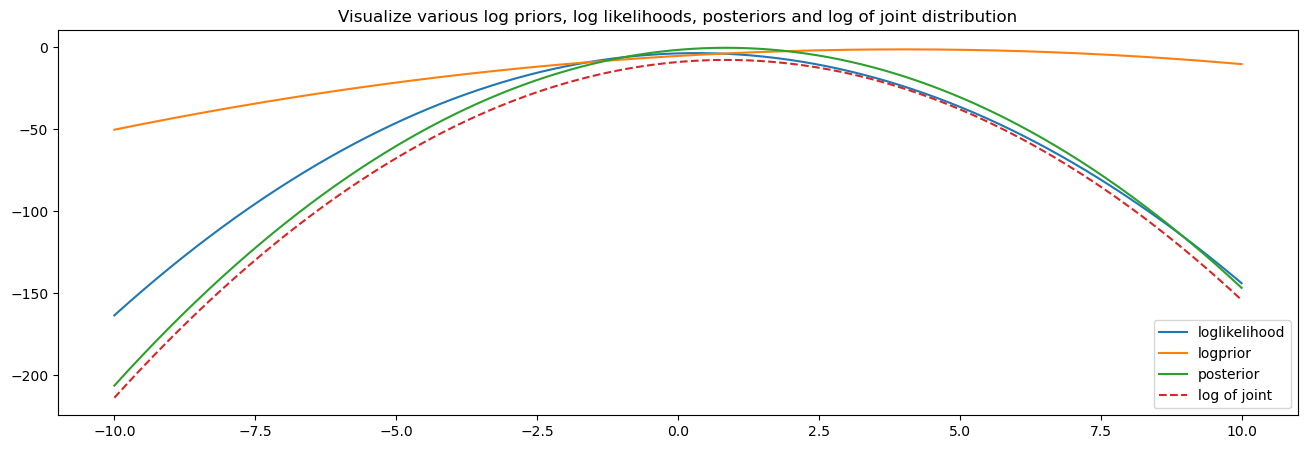

In [35]:
# PART 2 Q2

theta_0,tau = 4,1/2; 
parameter_domain = np.linspace(-10,10,1001); 

loglikelihood = np.sum(stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1), axis=0)
logprior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain) 

joint = loglikelihood+logprior # elementwise multiplication 

posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)
plt.figure(figsize=(16,5)); 
plt.plot(parameter_domain, loglikelihood, label="loglikelihood"); 
plt.plot(parameter_domain, logprior, label="logprior"); 
plt.plot(parameter_domain, posterior, label="posterior"); 
plt.plot(parameter_domain, joint, linestyle="--", label="log of joint"); 
plt.legend(); 
plt.title("Visualize various log priors, log likelihoods, posteriors and log of joint distribution"); 

# 3. What is the posterior distribution of a normal likelihood with  𝑝(𝜃)∝1?


If the prior distribution p(θ) is proportional to a constant (meaning that it is flat), in this case 1, and the likelihood function is a normal distribution, then the posterior distribution will be primarily determined by the likelihood. As such the posterior distribution will also be a normal distribution.

# 4. What's the difference between a log likelihood and log posterior when an improper prior is used? Hint: is has something to do with the log of the marginal likelihood constant. [Or, another way to start thinking about this is to instead as the question: What's the difference between a likelihood and posterior when an improper prior is used? Hint: is has something to do with the marginal likelihood constant.]

When using an improper prior that is proportional to a constant (let's say $c$), the log prior term in the log posterior expression becomes $log(c)$. Since $c$ is a constant, $log(c)$ is also a constant, and it does not depend on the model parameters $(θ)$.

Therefore when $c = 1$, $log(c) = 0$ we have the formula:

$log(Posterior) = log(Likelihood) - log(Marginal Likelihood Constant)$

From this we can see that by having an improper prior, the log likelihood and the log posterior differ by the log of the marginal likelihood constant